# Исследование закономерностей определяющих успешность игры


Заказчик исследования интернет-магазин «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## План исследования

### Шаг 1. Откроем файл с данными и изучим общую информацию

### Шаг 2. Подготовка данных
- Заменим названия столбцов (к нижнему регистру);
- Преобразуем данные в нужные типы. Опишем, в каких столбцах заменили тип данных и почему;

- Обработка пропусков при необходимости
- Пояснение, почему заполнили пропуски определённым образом или почему не стали это делать;
- Опишем причины, которые могли привести к пропускам;
- Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

### Шаг 3. Исследовательский анализ данных
- Сколько игр выпускалось в разные годы? Важны ли данные за все периоды?
- Как менялись продажи по платформам? Выберем платформы с наибольшими суммарными продажами и построем распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Возьмем данные за соответствующий актуальный период. Актуальный период определим в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- Какие платформы лидируют по продажам, растут или падают? 
- График «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Велика ли разница в продажах? А в средних продажах на разных платформах? 
- Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков? Построим диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. 
- Соотнесем выводы с продажами игр на других платформах.
- Общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

### Шаг 4. Портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5)
- Самые популярные жанры (топ-5)

Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### Шаг 5. Проверка гипотезы
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

### Шаг 6. Общий вывод

---

### Описание данных:
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы долларов)
- EU_sales — продажи в Европе (миллионы долларов)
- JP_sales — продажи в Японии (миллионы долларов)
- Other_sales — продажи в других странах (миллионы долларов)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

---

## Шаг 1. Откроем файл с данными и изучим общую информацию


In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from datetime import datetime

In [69]:
#загрузим датасет с данными и посмотрим на данные
games_data = pd.read_csv('/datasets/games.csv')
games_data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [70]:
#просмотрим инфо 
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Вывод

Таблица содержит данные о различных играх на разных платформах, имеются данные о годе релиза игры, жанр, о продажах в разных странах, оценка критиков, оценка пользователей и возрастной рейтинг. 

Имеются пропуски в столбцах Critic_Score, User_Score, Rating, причем одновременно во всех 3 столбцах, возможно, эти пропуски взаимосвязаны друг с другом. На первый взгляд эти пропуски имеются в довольно старых играх, и видимо их можно объяснить тем, что тогда просто не существовало каких-то рейтингов и оценок, это нужно будет еще дополнительно проверить.

Названия столбцов лучше привести к нижнему регистру. 

Поменять тип данных в столбце Year_of_Release с float на datetime для удобства дальнейшей работы с данными. 

---

## Шаг 2. Подготовка данных


### Замена названия столбцов (приведем к нижнему регистру)


In [71]:
#приведем названия столбцов к нижнему регистру
games_data.columns = map(str.lower, games_data.columns)
games_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Обработка пропусков и замена на нужный тип данных

In [72]:
#проверим на пропуски
games_data.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [73]:
#удалим пропуски из стобца name
games_data.dropna(subset = ['name'], inplace = True)

In [74]:
#т.к. нет данных по которым можно было бы восстановить пропуски по рейтингу, заполним пропуски пометкой "неизвестно"
games_data['rating']= games_data['rating'].fillna('неизвестно')

In [75]:
#проверим на пропуски
games_data.isnull().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating                0
dtype: int64

In [76]:
#просмотрим уникальные значения столбца user_score
games_data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [77]:
#стобец user_score содержит среди своих значений 'tbd' - 'будет определено позднее', т.к. оно мешает привести значения столбца
#к цифровому типу, заменим его на маркер -777
games_data['user_score'] = games_data['user_score'].replace('tbd', -777).astype('float')
games_data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,неизвестно
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,неизвестно
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,неизвестно
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,неизвестно


In [78]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16444 non-null float64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null float64
rating             16713 non-null object
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


### Подсчет суммарных продаж во всех регионах

In [79]:
#подсчитаем суммарные продажи во всех регионах и добавим результат в новый столбце all_sales
games_data['all_sales'] = games_data['na_sales'] + games_data['eu_sales'] + games_data['jp_sales'] + games_data['other_sales']
games_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,неизвестно,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,неизвестно,31.38


---

## Шаг 3. Исследовательский анализ данных

### Посмотрим, сколько игр выпускалось в разные годы

Text(0.5, 1.0, 'Количество игр выпущенных в разные годы')

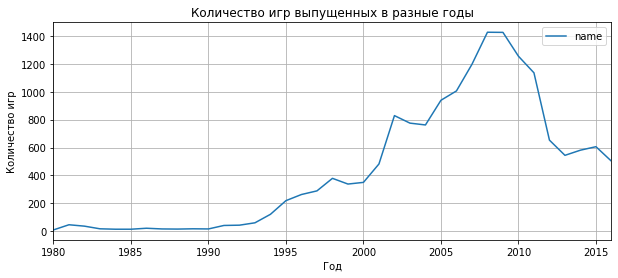

In [80]:
#построим график по количеству игр выпущенных в разные годы
games_by_years = (games_data
                  .pivot_table(index='year_of_release', values='name', aggfunc='count')
                  .plot(grid=True, figsize=(10, 4))
                 )
games_by_years
plt.ylabel('Количество игр')
plt.xlabel('Год')
plt.title('Количество игр выпущенных в разные годы')

По графику видно, что основной рост пошел примерно с 1993 года, достиг пика в 2008 и дальше пошел на спад. 


### Посмотрим, как менялись продажи по платформам.

Отберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [81]:
#создадим сводную таблицу по платформам и выручке
platform_pivot = games_data.pivot_table(index='platform', values='all_sales', aggfunc='sum')
platform_pivot.sort_values(by='all_sales', ascending = False).head()

,all_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12


In [82]:
#сохраним срез с топ5 платформ в переменной platform_top5
platform_top5 = platform_pivot.reset_index().sort_values(by='all_sales', ascending = False).head()['platform']

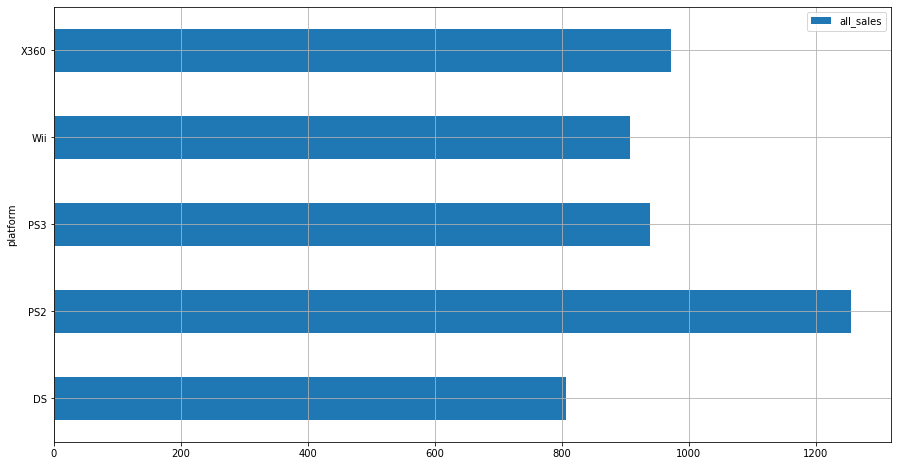

In [83]:
#постороим график по выручке платформ из топ5
platform_hist = (games_data
                .query('platform in @platform_top5')
                .pivot_table(index='platform', values='all_sales', aggfunc='sum')
                .plot(kind = 'barh', figsize = (15,8), grid = True)
               )


Text(0.5, 1.0, 'Рост и спад платформ по годам')

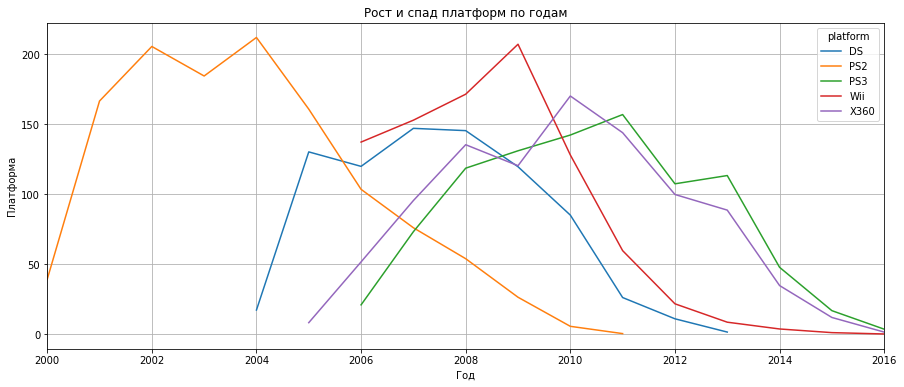

In [84]:
#построим распределение по годам
platform_by_years = (games_data
                     .query('year_of_release > 1991 and platform in @platform_top5')
                     .pivot_table(index='year_of_release', columns='platform', values='all_sales', aggfunc='sum')
                     .plot(grid=True, figsize=(15, 6))
                     
                    )
                
platform_by_years
plt.ylabel('Платформа')
plt.xlabel('Год')
plt.title('Рост и спад платформ по годам')


Как видно из графиков, в среднем новые платформы появляются и исчезают за 8-10лет.

### Какие платформы лидируют по продажам, растут или падают?

Для исследования выделим актуальный период времени, пусть это будет с 2012 по 2016, после большого пика в 2008  — эти данные помогут построить прогноз на 2017 год.

In [85]:
#создадим новую таблицу, где будут только актуальные данные с 2012 года и отсечены маркерные значения в user_score
actual_games_data = games_data.query('year_of_release >= 2012')

In [86]:
#создадим сводную таблицу по платформам и выручке
actual_pivot = (actual_games_data
                
                .pivot_table(index='platform', values='all_sales', aggfunc='sum')
               )
actual_pivot.sort_values(by='all_sales', ascending = False).head()

,all_sales
platform,
PS4,314.14
PS3,288.79
X360,236.54
3DS,194.61
XOne,159.32


In [87]:
#сохраним срез с топ5 платформ в переменной actual_top5
actual_top5 = actual_pivot.reset_index().sort_values(by='all_sales', ascending = False).head()['platform']

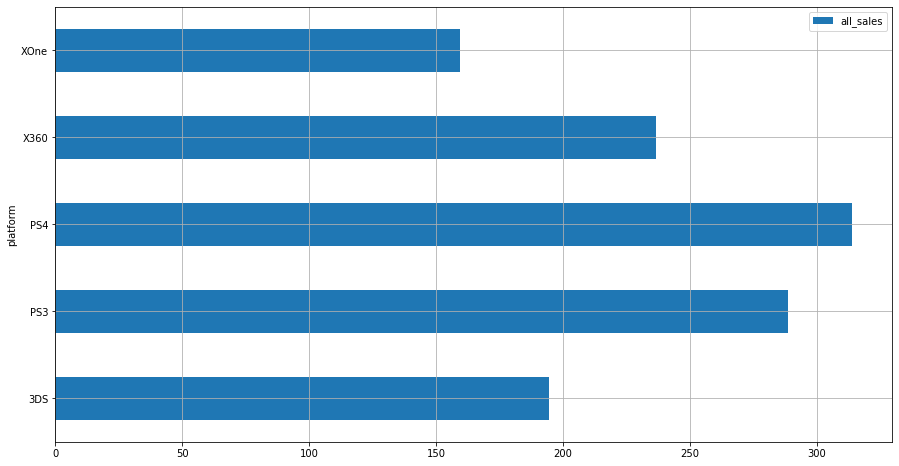

In [88]:
#постороим график по выручке платформ из топ5
actual_hist = (actual_games_data
                .query('platform in @actual_top5')
                .pivot_table(index='platform', values='all_sales', aggfunc='sum')
                .plot(kind = 'barh', figsize = (15,8), grid = True)
               )

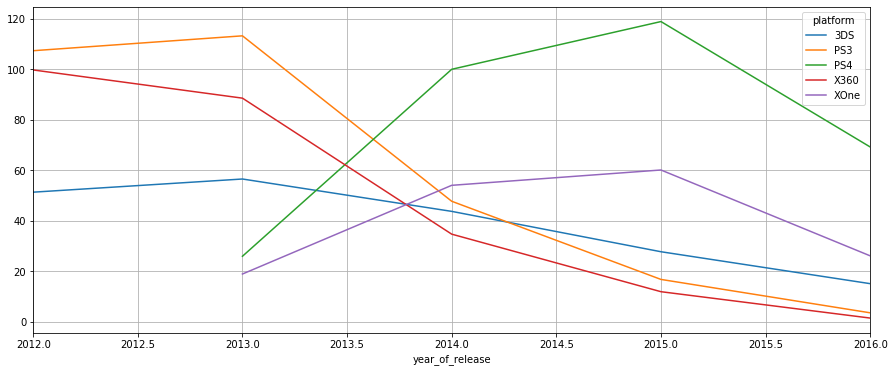

In [89]:
#построим распределение по годам
actual_platform_by_years = (actual_games_data
                     .query('platform in @actual_top5')
                     .pivot_table(index='year_of_release', columns='platform', values='all_sales', aggfunc='sum')
                     .plot(grid=True, figsize=(15, 6))
                     
                    )
                
actual_platform_by_years

Как видно из графиков, к 2016 году лидирует платформа PS4, пик по выручке пришелся на 2015 год, к 2016 пошел на спад. 

Затем идет XOne, его выручка значительно ниже чем PS4, пик пришелся так же как и у PS4 на 2015 год.

На 3-ем месте 3DS, в 2013 году была довольно популярна, но с тех пор идет на спад.

PS3 и X360 были популярны в 2013 году, к 2016 году почти умерли.

### Построим график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам

(0, 1)

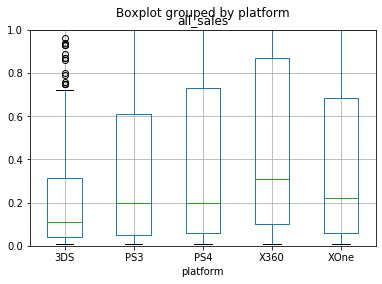

In [90]:
#построим boxplot для топ5 платформ в актуальном периоде времени
game_boxplot = (actual_games_data
                     .query('platform in @actual_top5')
                     .boxplot('all_sales', 'platform')
                )
plt.ylim(0, 1)

Наибольшая сумма продаж у X360, наименьшая у 3DS. 

В среднем, X360 так в лидерах, PS3, PS4 и XOne в среднем примерно одинаковы по продажам. 

Такую разницу по продажам на платформах можно объяснить тем, что в нашем актуальном периоде времени с 2012 по 2016 X360 уже был на пике своей популярности, в то время как PS4 и XOne появились только в 2013, соответственно продаж за 2012 у них нет. 

### Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков?

In [91]:
#сохраним нужный срез данных в переменную good_data
PS4_data = actual_games_data.query('platform == "PS4" and user_score > -777')

Text(0.5, 0, 'Оценка пользователей')

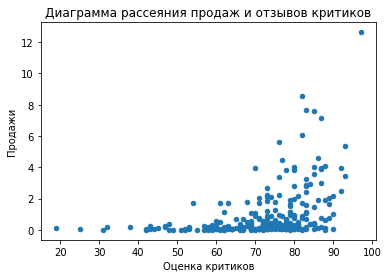

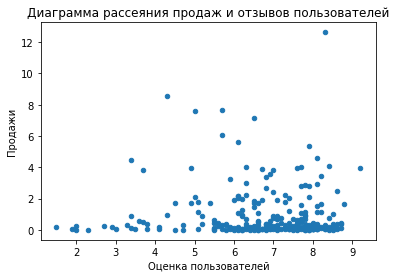

In [92]:
#построим диаграмму рассеяния продаж и отзывов критиков
PS4_data.plot(x='critic_score', y='all_sales', kind='scatter')
plt.title('Диаграмма рассеяния продаж и отзывов критиков')
plt.ylabel('Продажи')
plt.xlabel('Оценка критиков')
#построим диаграмму рассеяния продаж и отзывов пользователей
PS4_data.plot(x='user_score', y='all_sales', kind='scatter')
plt.title('Диаграмма рассеяния продаж и отзывов пользователей')
plt.ylabel('Продажи')
plt.xlabel('Оценка пользователей')

In [93]:
#рассчитаем корреляцию между продажами и отзывами критиков
PS4_data['all_sales'].corr(PS4_data['critic_score'])


0.40589480145836687

Отзывы и оценка критиков ощутимо вляют на продажи игр.

In [94]:
#рассчитаем корреляцию между продажами и отзывами пользователей
PS4_data['all_sales'].corr(PS4_data['user_score'])

-0.031957110204556424

Странно, но зависимости между оценкой пользователей и продажами не обнаружено. Вероятно это можно объяснить тем, что оценка критиков более авторитетна для пользователей, поэтому при выборе игры, юзеры больше ориентируются на отзывы именитых критиков.

### Соотнесем выводы с продажами игр на других платформах.

In [95]:
#сохраним срезы данных по платформам в отдельные переменные
X360_data = games_data.query('platform == "X360" and user_score > -777')
_3DS_data = games_data.query('platform == "3DS" and user_score > -777')
PS3_data = games_data.query('platform == "PS3" and user_score > -777')
XOne_data = games_data.query('platform == "XOne" and user_score > -777')

0.3895131235706668

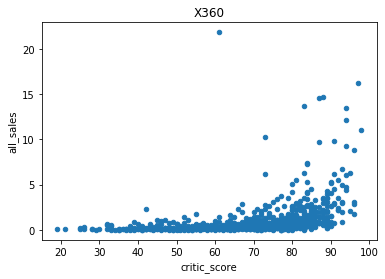

In [96]:
#построим диаграмму рассеяния продаж и отзывов критиков
X360_data.plot(x='critic_score', y='all_sales', kind='scatter', title = 'X360')
#расчитаем корреляцию между продажами и отзывами критиков
X360_data['all_sales'].corr(X360_data['critic_score'])

0.3398243344453552

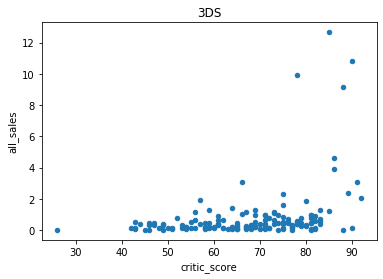

In [97]:
_3DS_data.plot(x='critic_score', y='all_sales', kind='scatter', title = '3DS')
_3DS_data['all_sales'].corr(_3DS_data['critic_score'])

0.42787500234912923

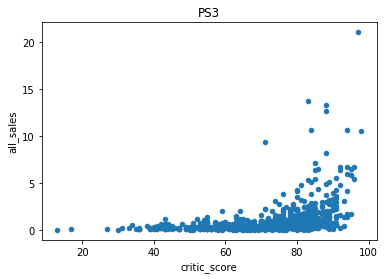

In [98]:
PS3_data.plot(x='critic_score', y='all_sales', kind='scatter', title = 'PS3')
PS3_data['all_sales'].corr(PS3_data['critic_score'])

0.4104220356129637

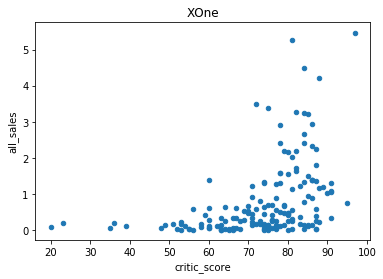

In [99]:
XOne_data.plot(x='critic_score', y='all_sales', kind='scatter', title = 'XOne')
XOne_data['all_sales'].corr(XOne_data['critic_score'])

0.11445882978454186

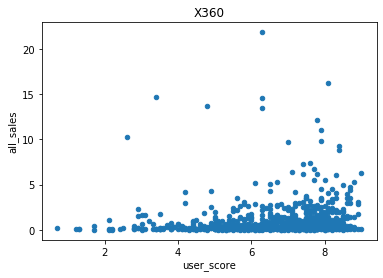

In [100]:
#построим диаграмму рассеяния продаж и отзывов пользователей
X360_data.plot(x='user_score', y='all_sales', kind='scatter', title = 'X360')
#расчитаем корреляцию между продажами и отзывами пользователей
X360_data['all_sales'].corr(X360_data['user_score'])

0.22480798039571082

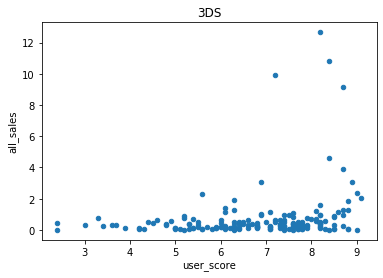

In [101]:
#построим диаграмму рассеяния продаж и отзывов пользователей
_3DS_data.plot(x='user_score', y='all_sales', kind='scatter', title = '3DS')
#расчитаем корреляцию между продажами и отзывами пользователей
_3DS_data['all_sales'].corr(_3DS_data['user_score'])

0.12669133936341712

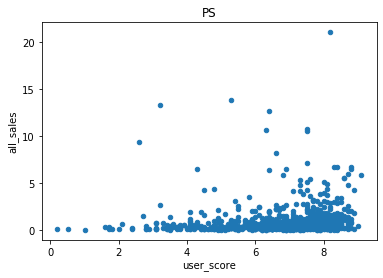

In [102]:
#построим диаграмму рассеяния продаж и отзывов пользователей
PS3_data.plot(x='user_score', y='all_sales', kind='scatter', title = 'PS')
#расчитаем корреляцию между продажами и отзывами пользователей
PS3_data['all_sales'].corr(PS3_data['user_score'])

-0.06892505328279412

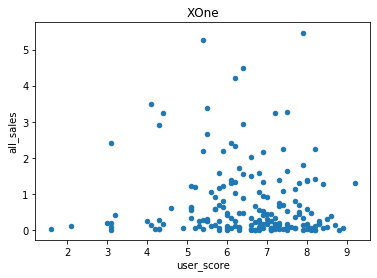

In [103]:
#построим диаграмму рассеяния продаж и отзывов пользователей
XOne_data.plot(x='user_score', y='all_sales', kind='scatter', title = 'XOne')
#расчитаем корреляцию между продажами и отзывами пользователей
XOne_data['all_sales'].corr(XOne_data['user_score'])

Как видно из коэффициента корреляции и диаграмм рассеяния, на остальных платформах из топ-5 повторяется та же история, оценки критиков существенно влияют на продажи, а оценки пользователей почти совсем не влияют, только на платформе 3DS можно увидеть влияние оценок пользователей на продажи.

### Посмотрим на общее распределение игр по жанрам.

In [104]:
#посторим сводную таблицу по количеству игр на каждый жанр
genre_name = (actual_games_data
              .pivot_table(index='genre', values='name', aggfunc='count')
              .sort_values(by='name', ascending=False))
genre_name

,name
genre,
Action,1031
Role-Playing,370
Adventure,302
Sports,268
Shooter,235
Misc,192
Racing,115
Fighting,109
Platform,85


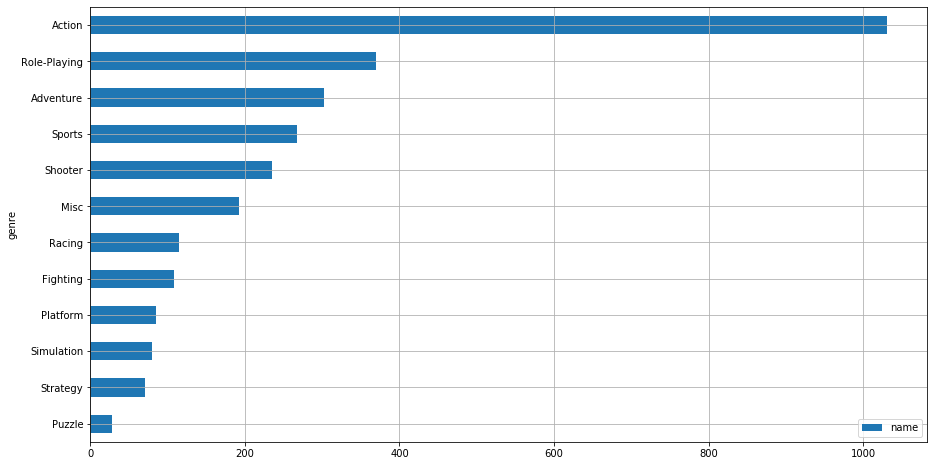

In [105]:
#посторим график по количеству игр на каждый жанр
genre_name = (actual_games_data
              .pivot_table(index='genre', values='name', aggfunc='count')
              .sort_values(by='name')
              .plot(kind = 'barh', figsize = (15,8), grid = True)
              
              )

Абсолютное большинство всех игр выходит в жанре Action, далее идут Role-Playing и Adventure.

In [106]:
#постороим сводную таблицу с общей прибылью на каждый жанр
genre_all_sales = (actual_games_data
              .pivot_table(index='genre', values='all_sales', aggfunc='sum')
              .sort_values(by='all_sales', ascending=False))
genre_all_sales

,all_sales
genre,
Action,441.12
Shooter,304.73
Role-Playing,192.80
Sports,181.07
Misc,85.04
Platform,61.00
Racing,53.50
Fighting,44.49
Simulation,35.12


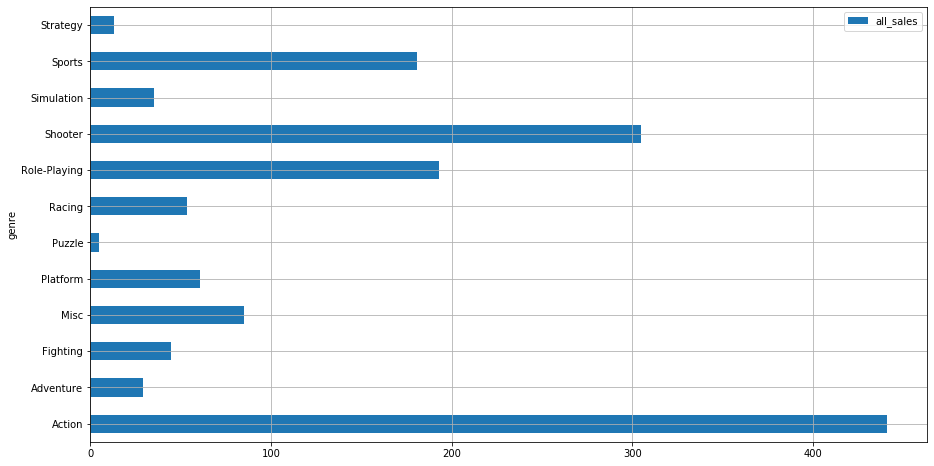

In [107]:
#постороим график с общей прибылью на каждый жанр
genre_all_sales = (actual_games_data
              .pivot_table(index='genre', values='all_sales', aggfunc='sum')
              .plot(kind = 'barh', figsize = (15,8), grid = True)
              )

Самыми прибыльными жанрами являются Action, Shooter, Role-Playing и Sports. Как видно из графика, они довольно сильно выделяются на фоне остальных жанров.

---

## Шаг 4. Портрет пользователя каждого региона

### Определим для пользователя каждого региона (NA, EU, JP):

#### - Самые популярные платформы (топ-5)

In [108]:
#определим топ-5 платформ для региона NA
na_top5 = (actual_games_data
           .pivot_table(index='platform', values='na_sales', aggfunc='sum')
           .sort_values(by='na_sales', ascending=False).head()
          )
na_top5

,na_sales
platform,
X360,140.05
PS4,108.74
PS3,103.38
XOne,93.12
3DS,55.31


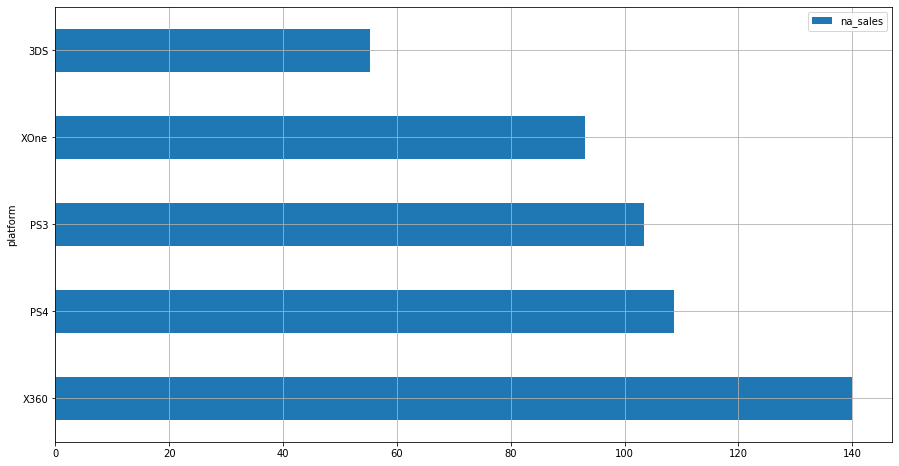

In [109]:
na_top5.plot(kind = 'barh', figsize = (15,8), grid = True)

In [110]:
#определим топ-5 платформ для региона EU
eu_top5 = (actual_games_data
           .pivot_table(index='platform', values='eu_sales', aggfunc='sum')
           .sort_values(by='eu_sales', ascending=False).head()
          )
eu_top5

,eu_sales
platform,
PS4,141.09
PS3,106.86
X360,74.52
XOne,51.59
3DS,42.64


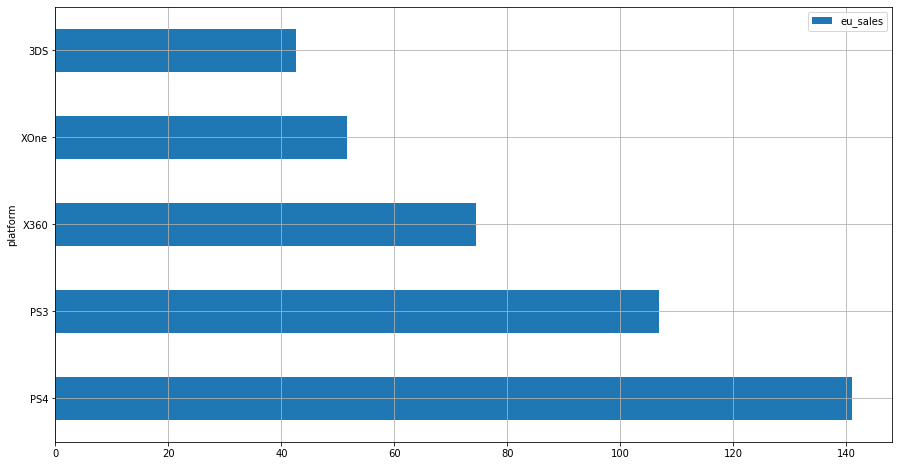

In [111]:
eu_top5.plot(kind = 'barh', figsize = (15,8), grid = True)

In [112]:
#определим топ-5 платформ для региона JP
jp_top5 = (actual_games_data
           .pivot_table(index='platform', values='jp_sales', aggfunc='sum')
           .sort_values(by='jp_sales', ascending=False).head()
          )
jp_top5

,jp_sales
platform,
3DS,87.79
PS3,35.29
PSV,21.04
PS4,15.96
WiiU,13.01


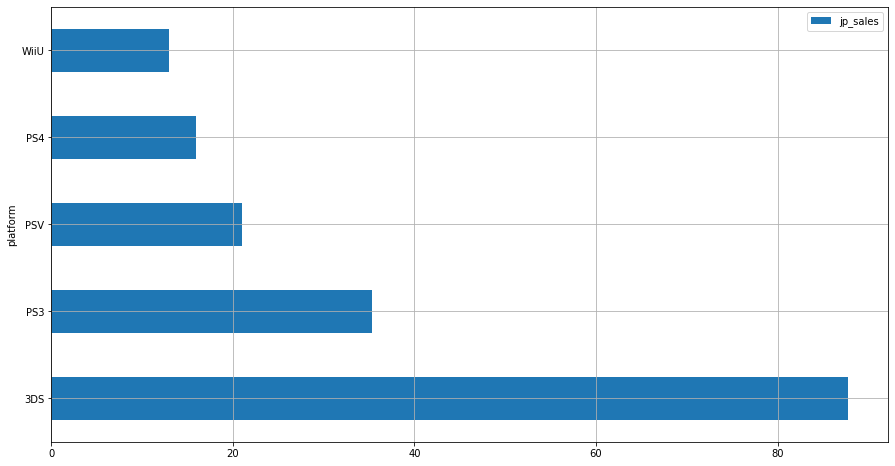

In [113]:
jp_top5.plot(kind = 'barh', figsize = (15,8), grid = True)

Для NA топ-5 платформ это: X360 на 1-ом месте, продажи на 140,5 миллионов долларов. Далее идут PS4 и PS3 с продажами на 108,74 и 103,38 миллиона долларов соответственно. XOne на 4-ом месте, заработал 93,12 миллиона долларов. На 5-ом месте 3DS, продажи на этой платформе почти в 3 раза меньше, чем на X360, всего 55.31 миллионов долларов.

Для региона EU топ-5 платформ это: PS4	141.09, PS3	106.86, X360 74.52, XOne 51.59 и в конце 3DS 42.64. Данные похожи на NA, только поменялись местами X360 и PS4.

Для Японии неожиданно самой популярной стала платформа-аутсайдер с других регионов - 3DS, продажи на 87.79 млн доларов. 
На 2-ом и 3-ем месте платформы PS3 и PS4, продажи по 35.29 и 15.96 млн долларов соответственно. На последнем месте WiiU 13.01 млн долларов. Уровень продаж по Японии значительно меньше чем в Северной Америке и Европе.

Такое отличие Японии от других регионов можно объяснить тем, что Nintendo 3DS разработана в Японии и в первую очередь для японцев. Sony PlayStation так же разработана в Японии, а консоль Wii U явлется продуктом Nintendo.

#### - Самые популярные жанры (топ-5)


In [114]:
#построим сводную таблицу с наиболее популярными жанрами игр для региона NA
na_genre_top5 = (actual_games_data
              .pivot_table(index='genre', values='na_sales', aggfunc='sum')
              .sort_values(by='na_sales', ascending=False)).head()
na_genre_top5

,na_sales
genre,
Action,177.84
Shooter,144.77
Sports,81.53
Role-Playing,64.00
Misc,38.19


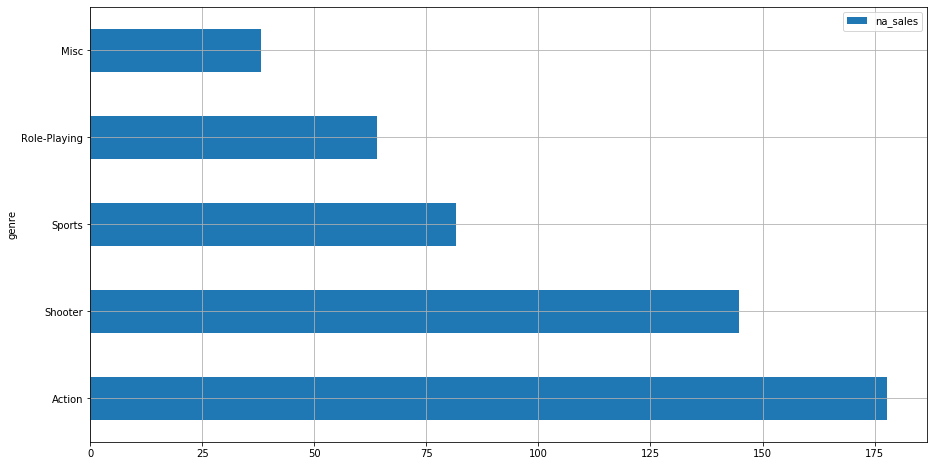

In [115]:
na_genre_top5.plot(kind = 'barh', figsize = (15,8), grid = True)

In [116]:
#построим сводную таблицу с наиболее популярными жанрами игр для региона EU
eu_genre_top5 = (actual_games_data
              .pivot_table(index='genre', values='eu_sales', aggfunc='sum')
              .sort_values(by='eu_sales', ascending=False)).head()
eu_genre_top5

,eu_sales
genre,
Action,159.34
Shooter,113.47
Sports,69.09
Role-Playing,48.53
Racing,27.29


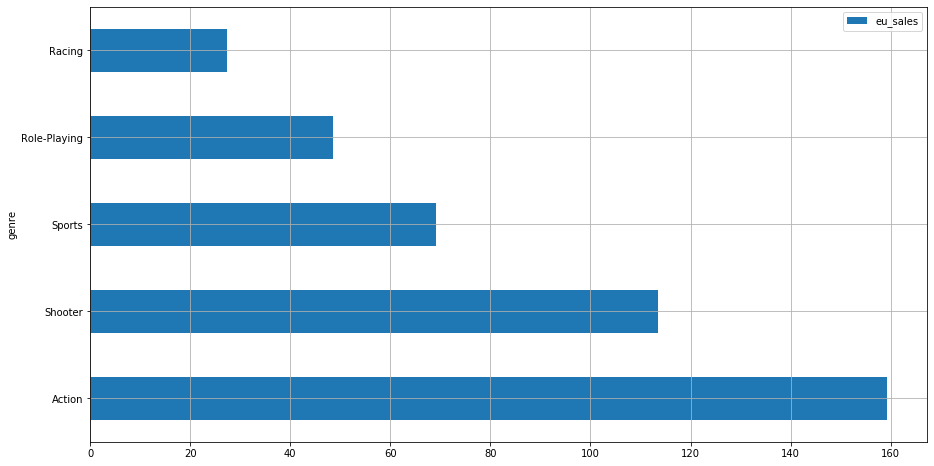

In [117]:
eu_genre_top5.plot(kind = 'barh', figsize = (15,8), grid = True)

In [118]:
#построим сводную таблицу с наиболее популярными жанрами игр для региона JP
jp_genre_top5 = (actual_games_data
              .pivot_table(index='genre', values='jp_sales', aggfunc='sum')
              .sort_values(by='jp_sales', ascending=False)).head()
jp_genre_top5

,jp_sales
genre,
Role-Playing,65.44
Action,52.80
Misc,12.86
Simulation,10.41
Fighting,9.44


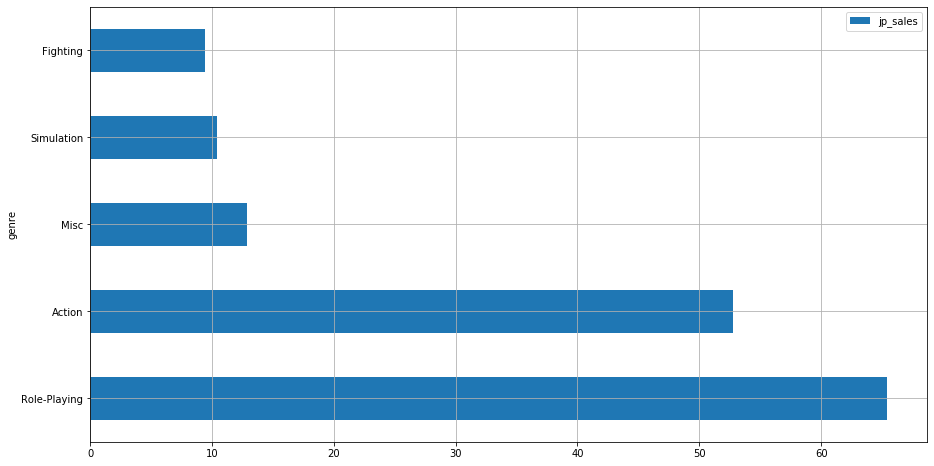

In [119]:
jp_genre_top5.plot(kind = 'barh', figsize = (15,8), grid = True)

В Северной Америке наиболее популярные жанры игр это - Action продажи на 177.84 млн долларов, Shooter 144.77 млн долларов, Sports 81.53 млн долларов,  Role-Playing	64.00 млн долларов и  Misc	38.19 млн долларов.

В Европе у игроков похожие предпочтения, в 3-ке победителей Action, Shooter и Sports, уровень продаж ниже чем в Америке, но в целом сопоставим. На 4-ом месте Role-Playing, а на 5-ом Racing.

Япония снова отличилась, наиболее популярный жанр это Role-Playing, далее Action, Misc, Simulation и Fightning. 

#### - Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [120]:
#посмотрим, игры какого возрастного рейтинга наиболее популярны
rating_pivot = (actual_games_data
                .query('rating != "неизвестно"')
                .pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
                .reset_index()
               )
rating_pivot



,rating,eu_sales,jp_sales,na_sales
0,E,113.03,28.33,114.37
1,E10+,55.37,8.19,75.70
2,M,193.96,21.20,231.57
3,T,52.96,26.02,66.02


Text(0.5, 1.0, 'Продажи по рейтингу JP')

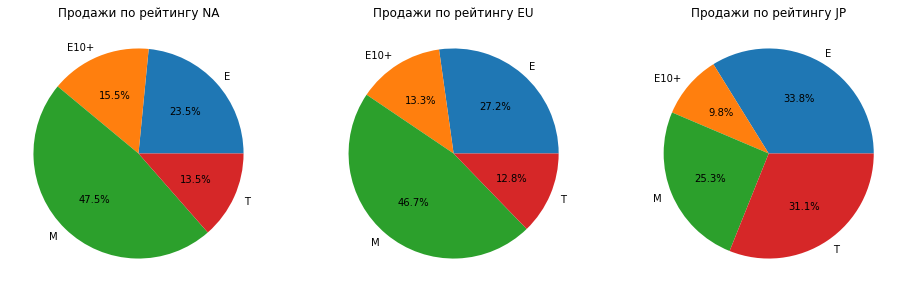

In [121]:
fig, ax = plt.subplots(1, 3)
fig.set_size_inches(16, 7)
ax[0].pie(rating_pivot['na_sales'], labels = rating_pivot['rating'], autopct='%1.1f%%')
ax[0].set_ylabel('')
ax[0].set_title('Продажи по рейтингу NA')
ax[1].pie(rating_pivot['eu_sales'], labels = rating_pivot['rating'], autopct='%1.1f%%')
ax[1].set_ylabel('')
ax[1].set_title('Продажи по рейтингу EU')
ax[2].pie(rating_pivot['jp_sales'], labels = rating_pivot['rating'], autopct='%1.1f%%')
ax[2].set_ylabel('')
ax[2].set_title('Продажи по рейтингу JP')

В Северной Америке и Европе наиболее популярны игры рейтинга М, очевидно возрастной рейтинг имеет влияние на продажи. 
Японцы больше предпочитают игры рейтинга Т.

### Выводы:
Среднестатистический пользователь Северной Америки предпочитает играть на платформе X360 в игру жанра Action и рейтинг этой игры будет M.

Среднестатистический пользователь Европы предпочитает играть на PS4 в игру жанра Action и рейтинг этой игры будет M.

Среднестатистический пользователь из Японии предпочитает играть на 3DS в игру жанра Role-Playing и рейтинг игры будет T.

В целом северо-американцы и европейцы похожи в своих предпочтениях, а японцы отличаются.

---

## Шаг 5. Проверьте гипотезы

### Определим гипотезы:
H0 - средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H1 - средние пользовательские рейтинги платформ Xbox One и PC отличаются

Для проверки гипотез будем использовать Т-критерий Стьюдента, потому что выборки независимы друг от друга и имеют нормальное распределение.

Значение альфа = 0.05

In [122]:
alpha = 0.05

In [123]:
#заполним пропуски user_score маркером, потому что иначе не рассчитать  p-значение
actual_games_data['user_score']= actual_games_data['user_score'].fillna(-777)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [124]:
#сохраним срез данных по платформе Xbox One в переменную xboxOne
xboxOne = actual_games_data.query('platform == "XOne" and user_score != "-777"')
xboxOne.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
165,Grand Theft Auto V,XOne,2014.0,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014.0,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
242,Halo 5: Guardians,XOne,2015.0,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
270,Fallout 4,XOne,2015.0,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22
373,Assassin's Creed: Unity,XOne,2014.0,Action,2.27,0.90,0.00,0.33,72.0,4.1,M,3.50


In [125]:
#сохраним срез данных по платформе PC в переменную pc
pc = actual_games_data.query('platform == "PC" and user_score != "-777"')
pc.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
192,Diablo III,PC,2012.0,Role-Playing,2.44,2.16,0.0,0.54,88.0,4.0,M,5.14
458,The Sims 4,PC,2014.0,Simulation,1.00,1.82,0.0,0.23,70.0,3.9,T,3.05
688,Guild Wars 2,PC,2012.0,Action,0.96,1.07,0.0,0.27,90.0,7.9,T,2.30
959,World of Warcraft: Mists of Pandaria,PC,2012.0,Role-Playing,0.84,0.76,0.0,0.22,82.0,4.8,T,1.82
1095,StarCraft II: Heart of the Swarm,PC,2013.0,Strategy,0.83,0.66,0.0,0.18,86.0,7.9,T,1.67


In [126]:
xboxOne = xboxOne['user_score']
pc = pc['user_score']

In [127]:
results = st.ttest_ind(xboxOne, pc)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5535080500643661
Не получилось отвергнуть нулевую гипотезу


В среднем пользовательские рейтинги на ПК и на Xbox One не отличаются.

### Определим гипотезы:
H0 - средние пользовательские рейтинги жанров Action и Sports не отличаются.

H1 - средние пользовательские рейтинги жанров Action и Sports разные.

Для проверки гипотез будем использовать Т-критерий Стьюдента, потому что выборки независимы друг от друга и имеют нормальное распределение.

Значение альфа = 0.05


In [128]:
#сохраним срез данных по жанру Action в переменную action
action = actual_games_data.query('genre == "Action" and user_score != "-777"')
action.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
81,FIFA Soccer 13,PS3,2012.0,Action,1.06,5.01,0.13,1.97,88.0,6.6,E,8.17
127,Assassin's Creed III,PS3,2012.0,Action,2.64,2.52,0.16,1.12,85.0,6.9,M,6.44


In [129]:
#сохраним срез данных по жанру Sports в переменную sports
sports = actual_games_data.query('genre == "Sports" and user_score != "-777"')
sports.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
94,FIFA 17,PS4,2016.0,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
126,FIFA 14,PS3,2013.0,Sports,0.78,4.24,0.07,1.37,86.0,4.3,E,6.46
143,FIFA 15,PS4,2014.0,Sports,0.80,4.33,0.05,0.90,82.0,5.7,E,6.08
264,FIFA 15,PS3,2014.0,Sports,0.58,3.02,0.04,0.64,NaN,4.5,E,4.28


In [130]:
action = action['user_score']
sports = sports['user_score']

In [131]:
results = st.ttest_ind(action, sports)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.7163089460934874e-26
Отвергаем нулевую гипотезу


Средние пользовательские рейтинги жанров Action и Sports все же разные.

## Шаг 6. Общий вывод

В начале исследования определили актульный период времени, данные за который помогут спрогнозировать потенциально популярный продукт и спланировать рекламные кампании. Таким периодом выделили от 2012 года и позже. 

Далее, опредилили топ-5 платформ с наибольшими продажами за актуальный период. По мировым продажам это(цифры указаны в миллионах долларов):
- 1.PS4	314.14
- 2.PS3	288.79
- 3.X360 236.54
- 4.3DS	194.61
- 5.XOne 159.32

Так как популярность X360 и PS3 к 2016 году прошла и снизилась почти до нуля, то наиболее актуальными на 2017 вариантами будут PS4, XOne и 3DS.

Так же, определили наиболее продаваемые жанры в играх(цифры указаны в миллионах долларов):
- 1.Action	441.12
- 2.Shooter	304.73
- 3.Role-Playing  192.80
- 4.Sports	181.07
- 5.Misc 85.04

Далее был проведен анализ по предпочтениям пользователей в Северной Америке, Европе и Японии.

Наиболее популярные платформы и жанры для Северной Америки(цифры указаны в миллионах долларов).

Платформы:
- 1.X360 140.05   
- 2.PS4	108.74   
- 3.PS3	103.38   
- 4.XOne 93.12    
- 5.3DS	55.31   

Жанры:
- 1.Action	177.84
- 2.Shooter 144.77
- 3.Sports	81.53
- 4.Role-Playing 64.00
-  5.Misc 38.19

Наиболее популярные платформы и жанры для Европы(цифры указаны в миллионах долларов).

Платформы:
- 1.PS4	141.09   
- 2.PS3	106.86   
- 3.X360 74.52    
- 4.XOne 51.59    
- 5.3DS	42.64    

Жанры:
- 1.Action	159.34
- 2.Shooter	113.47
- 3.Sports	69.09
- 4.Role-Playing 48.53
- 5.Racing	27.29
 
Наиболее популярные платформы и жанры для Японии(цифры указаны в миллионах долларов):

Платформы:
- 1.3DS	87.79    
- 2.PS3	35.29    
- 3.PSV	21.04    
- 4.PS4	15.96    
- 5.WiiU	13.01    

Жанры:
- 1.Role-Playing 65.44
- 2.Action	52.80
- 3.Misc 12.86
- 4.Simulation	10.41
- 5.Fighting 9.44


Пользователи Северной Америки и Европы в целом предпочитают одни и те же платформы и жанры. А вот японцы предпочитают платформы только японских производителей.

Далее, изучили влияние рейтингов ESRB на продажи в отдельных регионах.
В Северной Америке и Европе предпочитают игры для взрослых рейтинга М. Японцы чаще выбирают игры для подростков рейтинг Т, видимо потому что у взрослых японцев на игры просто нет времени.

Среднестатистический пользователь Северной Америки предпочитает играть на платформе X360 в игру жанра Action и рейтинг этой игры будет M.

Среднестатистический пользователь Европы предпочитает играть на PS4 в игру жанра Action и рейтинг этой игры будет M.

Среднестатистический пользователь из Японии предпочитает играть на 3DS в игру жанра Role-Playing и рейтинг игры будет T.

В целом северо-американцы и европейцы похожи в своих предпочтениях, а японцы отличаются.

Так же, изучили влияют ли оценки критиков и пользователей на продажи игры. Оказалось, что оценки критиков существенно влияют на продажи, а оценки пользователей почти совсем не влияют, только на платформе 3DS можно увидеть влияние оценок пользователей на продажи.





Подводя итоги, можно сказать, что закономерности определяющие популярность игр это:
- платформа, наиболее актуальные это - PS4,  XOne и 3DS
- высокая оценка критиков
- жанр игры, наиболее популярные: Action, Role-Playing, Adventure, Sports
- рейтинг М или Т



	